In [101]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [102]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [103]:
x_train.shape , x_train[0].shape

((60000, 28, 28), (28, 28))

In [104]:
y_train[0]

5

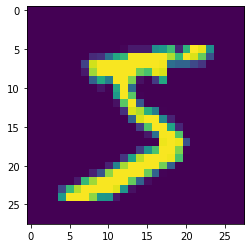

In [105]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

Scaling the values in the x_train and x_test array.

In [106]:
x_train = x_train/255
x_test = x_test/255

## Model

In [107]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [108]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [110]:
history =model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2877 - accuracy: 0.9173 - val_loss: 0.1519 - val_accuracy: 0.9570
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1234 - accuracy: 0.9636 - val_loss: 0.1122 - val_accuracy: 0.9668
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0829 - accuracy: 0.9758 - val_loss: 0.1098 - val_accuracy: 0.9666
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.0998 - val_accuracy: 0.9703
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0911 - val_accuracy: 0.9732
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0372 - accuracy: 0.9891 - val_loss: 0.0880 - val_accuracy: 0.9743
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0812 - val_accuracy:

In [111]:
y_prob = model.predict(x_test)

In [112]:
y_pred= y_prob.argmax(axis=1)

In [113]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.9762

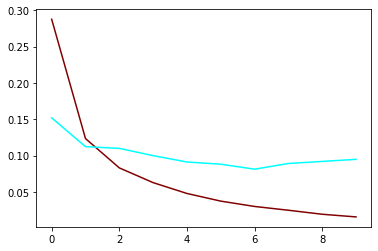

In [114]:
plt.plot(history.history['loss'],color='maroon') 
plt.plot(history.history['val_loss'],color='aqua') 

#### Prediction:

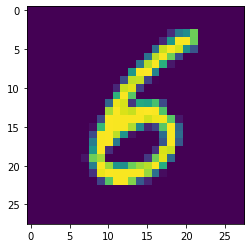

In [129]:
plt.imshow(x_test[7209])

In [130]:
y_test[7209]

6

In [131]:
model.predict(x_test[7209].reshape(1,28,28)).argmax(axis=1)

array([6])